In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import os
from pandas_profiling import ProfileReport

In [3]:
os.getcwd()

'C:\\Users\\marc_\\OneDrive\\Documents\\Uni-TeaM-Photography-3\\2020T3\\MATH5386\\assesments\\ass2\\notebooks'

In [4]:
df = pd.read_csv("../data/raw/abalone/abalone.data", header = None)

In [5]:
pp = ProfileReport(df)
pp.to_widgets()

In [82]:

df2 = df.drop(['0','8'], axis=1)
df3 = MinMaxScaler().fit_transform(df2)
pca = PCA()
df3_pca = pca.fit_transform(df2)
# plt.plot(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_) # PCA covers 97.41% of variance across numeric features 
sex = pd.get_dummies(df.iloc[:,0], prefix = "Sex")
print(sex)
df4 = pd.concat([sex, pd.Series(df3_pca[:,0], name = 'pca')], axis = 1)
# df4 = pd.concat([sex, df2], axis = 1)
df4
X_train, X_test, y_train, y_test = train_test_split(df4, df.iloc[:,8], test_size = 0.2)

[9.74100729e-01 1.14183886e-02 8.37567021e-03 3.03865180e-03
 1.41047670e-03 1.22936128e-03 4.26722250e-04]
      Sex_F  Sex_I  Sex_M
0         0      0      1
1         0      0      1
2         1      0      0
3         0      0      1
4         0      1      0
...     ...    ...    ...
4172      1      0      0
4173      0      0      1
4174      0      0      1
4175      1      0      0
4176      0      0      1

[4177 rows x 3 columns]


In [21]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier, export_text, export_graphviz

In [83]:
dt = DecisionTreeRegressor()
# dt.fit(df4, df.iloc[:,8])
dt.fit(X_train, y_train)
print(dt.__repr__().replace("()",""))
print(dt.tree_)
# plot_tree(dt,filled = True)
# plt.show()
# fig.savefig('imagename.png')
# plot_tree(dt)
# plt.savefig("tree_reg_plot2.png", dpi = 1000)

DecisionTreeRegressor


In [23]:
print(export_graphviz(dt))

digraph Tree {
node [shape=box] ;
0 [label="X[9] <= 0.168\nmse = 10.393\nsamples = 4177\nvalue = 9.934"] ;
1 [label="X[9] <= 0.059\nmse = 4.572\nsamples = 1427\nvalue = 7.556"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[9] <= 0.027\nmse = 2.337\nsamples = 361\nvalue = 5.687"] ;
1 -> 2 ;
3 [label="X[6] <= 0.023\nmse = 1.045\nsamples = 118\nvalue = 4.458"] ;
2 -> 3 ;
4 [label="X[7] <= 0.005\nmse = 0.778\nsamples = 18\nvalue = 3.333"] ;
3 -> 4 ;
5 [label="X[5] <= 0.027\nmse = 0.688\nsamples = 4\nvalue = 2.25"] ;
4 -> 5 ;
6 [label="X[9] <= 0.003\nmse = 0.25\nsamples = 2\nvalue = 1.5"] ;
5 -> 6 ;
7 [label="mse = 0.0\nsamples = 1\nvalue = 1.0"] ;
6 -> 7 ;
8 [label="mse = 0.0\nsamples = 1\nvalue = 2.0"] ;
6 -> 8 ;
9 [label="mse = 0.0\nsamples = 2\nvalue = 3.0"] ;
5 -> 9 ;
10 [label="X[6] <= 0.021\nmse = 0.372\nsamples = 14\nvalue = 3.643"] ;
4 -> 10 ;
11 [label="X[5] <= 0.037\nmse = 0.354\nsamples = 12\nvalue = 3.75"] ;
10 -> 11 ;
12 [label="X[6] <= 0.02\nmse 

In [99]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(min(ccp_alphas))
print(max(ccp_alphas))
print(len(ccp_alphas))
# ccp_alphas = np.linspace(min(ccp_alphas), max(ccp_alphas), num = 100)
ccp_alphas = np.linspace(min(ccp_alphas), 0.5, num = 100)


0.0
2.607933419709637
1667


In [91]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)



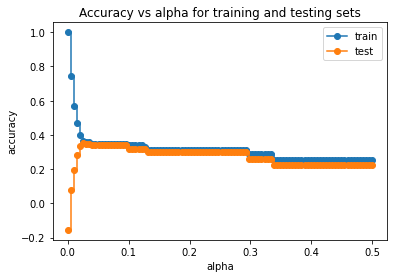

0.025252525252525256
[-0.15507282318080406, 0.07643334651871792, 0.1976341382075597, 0.28021150715400145, 0.33553826765028083, 0.352774221802426, 0.3486589450198362, 0.3486589450198362, 0.3409471558889713, 0.3409471558889713, 0.3409471558889713, 0.3409471558889713, 0.3409471558889713, 0.3409471558889713, 0.3409471558889713, 0.3409471558889713, 0.3409471558889713, 0.3409471558889713, 0.3409471558889713, 0.3409471558889713, 0.3202138037688739, 0.3202138037688739, 0.3202138037688739, 0.3202138037688739, 0.3202138037688739, 0.3199895044771125, 0.30160815090780135, 0.30160815090780135, 0.30160815090780135, 0.30160815090780135, 0.30160815090780135, 0.30160815090780135, 0.30160815090780135, 0.30160815090780135, 0.30160815090780135, 0.30160815090780135, 0.30160815090780135, 0.30160815090780135, 0.30160815090780135, 0.30160815090780135, 0.30160815090780135, 0.30160815090780135, 0.30160815090780135, 0.30160815090780135, 0.30160815090780135, 0.30160815090780135, 0.30160815090780135, 0.30160815090

In [96]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


print(ccp_alphas[test_scores.index([x for x in test_scores if x == max(test_scores)])])
print(test_scores)
# plot_tree(clfs[1])
# plt.show()
# plt.savefig("test.png", dpi = 1000)
# print(export_graphviz(clfs[1], filled=True, leaves_parallel=True))

In [89]:
print(export_graphviz(clfs[1], filled=True, leaves_parallel=True))

digraph Tree {
node [shape=box, style="filled", color="black"] ;
graph [ranksep=equally, splines=polyline] ;
0 [label="X[3] <= -0.41\nmse = 10.302\nsamples = 3341\nvalue = 9.927", fillcolor="#efb387"] ;
1 [label="X[3] <= -0.823\nmse = 4.437\nsamples = 925\nvalue = 7.317", fillcolor="#f7d7c0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= -0.922\nmse = 1.974\nsamples = 214\nvalue = 5.43", fillcolor="#fcf1e9"] ;
1 -> 2 ;
3 [label="mse = 0.824\nsamples = 83\nvalue = 4.434", fillcolor="#ffffff"] ;
2 -> 3 ;
4 [label="mse = 1.676\nsamples = 131\nvalue = 6.061", fillcolor="#fae8db"] ;
2 -> 4 ;
5 [label="X[1] <= 0.5\nmse = 3.784\nsamples = 711\nvalue = 7.885", fillcolor="#f5cfb4"] ;
1 -> 5 ;
6 [label="mse = 4.266\nsamples = 229\nvalue = 9.022", fillcolor="#f2bf9b"] ;
5 -> 6 ;
7 [label="X[3] <= -0.573\nmse = 2.649\nsamples = 482\nvalue = 7.344", fillcolor="#f7d7bf"] ;
5 -> 7 ;
8 [label="mse = 1.882\nsamples = 295\nvalue = 6.946", fillcolor="#f8dcc8"] ;
7 -> 8